<a href="https://colab.research.google.com/github/Nico412-cyber/msci151/blob/main/MIS203_W4_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 import pandas as pd

# Load the dataset
file_path = "/content/Melbourne_housing_FULL (1).csv"
df = pd.read_csv(file_path)

# Display the df
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [4]:
df[['Rooms', 'Price']].corr()

,Rooms,Price
Rooms,1.000000,0.465238
Price,0.465238,1.000000


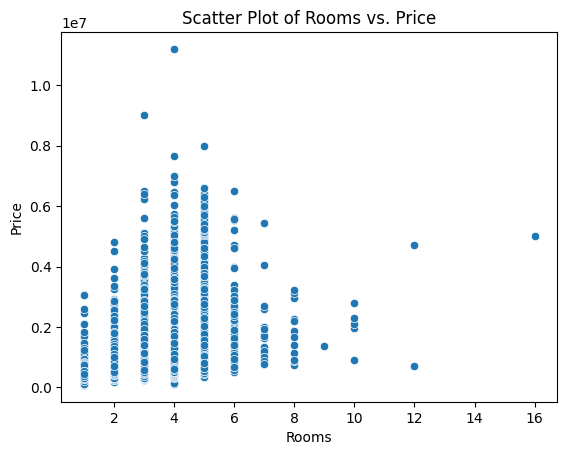

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=df["Rooms"], y=df["Price"])
plt.title("Scatter Plot of Rooms vs. Price")
plt.show()

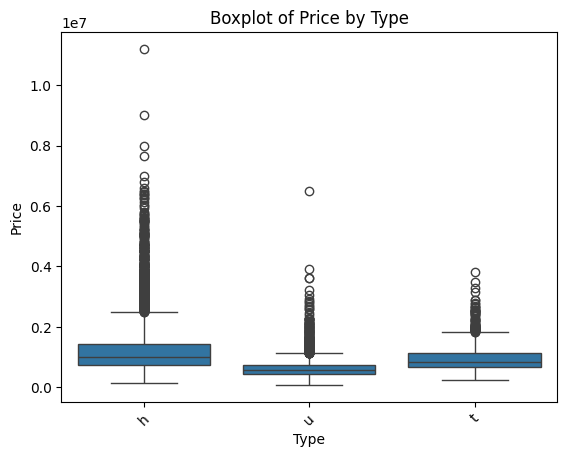

In [8]:
sns.boxplot(x=df["Type"], y=df["Price"])
plt.title("Boxplot of Price by Type")
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()

In [10]:
df[['Suburb', 'Regionname']].value_counts()

,,count
Suburb,Regionname,
Reservoir,Northern Metropolitan,844
Bentleigh East,Southern Metropolitan,583
Richmond,Northern Metropolitan,552
Glen Iris,Southern Metropolitan,491
Preston,Northern Metropolitan,485
...,...,...
Belgrave,Eastern Victoria,1
Wandin North,Eastern Victoria,1
Yarra Glen,Northern Victoria,1


In [12]:
df.groupby(['Regionname', 'Suburb'])['Price'].mean()

Regionname            Suburb         
Eastern Metropolitan  Bayswater          7.404118e+05
                      Bayswater North    7.405778e+05
                      Bellfield          8.201731e+05
                      Blackburn          1.335715e+06
                      Blackburn North    1.136711e+06
                                             ...     
Western Victoria      Darley             3.800000e+05
                      Eynesbury          7.000000e+05
                      Hopetoun Park               NaN
                      Melton             4.345833e+05
                      Melton South       4.236920e+05
Name: Price, Length: 350, dtype: float64

In [14]:
pd.crosstab(df["Type"], df["Method"])

Method,PI,PN,S,SA,SN,SP,SS,VB,W
Type,,,,,,,,,
h,3214,182,14047,155,1015,3293,28,1942,104
t,605,49,1881,27,111,510,4,380,13
u,1031,77,3816,44,191,1292,4,786,56


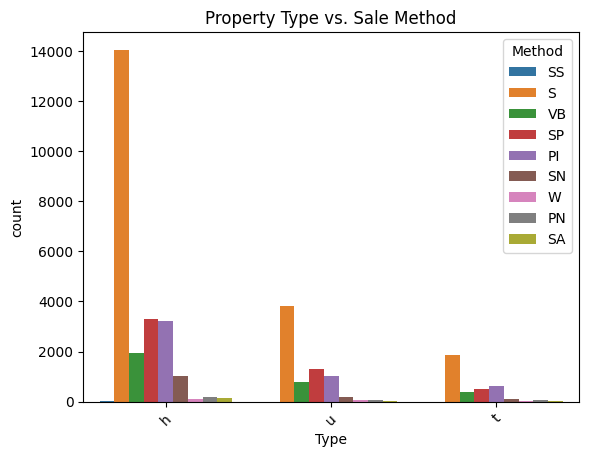

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=df["Type"], hue=df["Method"])
plt.title("Property Type vs. Sale Method")
plt.xticks(rotation=45)
plt.show()

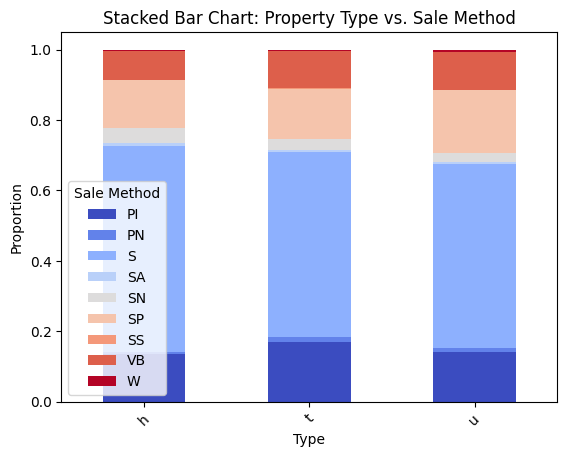

In [18]:
pd.crosstab(df["Type"], df["Method"], normalize="index").plot(kind="bar",
stacked=True, colormap="coolwarm")
plt.title("Stacked Bar Chart: Property Type vs. Sale Method")
plt.ylabel("Proportion")
plt.legend(title="Sale Method")
plt.xticks(rotation=45)
plt.show()

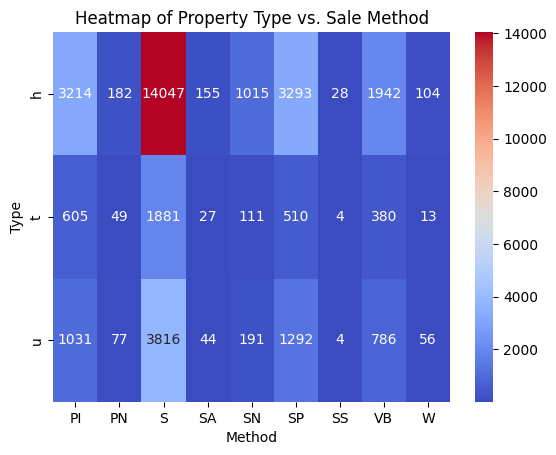

In [20]:
import numpy as np
cross_tab = pd.crosstab(df["Type"], df["Method"])
sns.heatmap(cross_tab, annot=True, cmap="coolwarm", fmt="d")
plt.title("Heatmap of Property Type vs. Sale Method")
plt.show()